In [2]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Infielder Datasets

In [3]:
#dfinf1 (Infielders who played btwn 30 to 100 gms) = clutch_outf_30.csv
#dfinf2 (Infielders who played at least 100 gms) = clutch_outf_100.csv
#dfinf3 (Infielders who made atleast 5 allstar gms) = allstr_clutch_outf.csv

## Data Ingestion

In [4]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [93]:
#dfinf1 = pd.read_csv('clutch_inf_30.csv', index_col=0)
#dfinf2 = pd.read_csv('clutch_inf_100.csv', index_col=0)
dfinf3 = pd.read_csv('allstr_clutch_inf.csv', index_col=0)

In [94]:
#Clear data set of NaN values
#dfinf1 = dfinf1.fillna(0)
#dfinf2 = dfinf2.fillna(0)
dfinf3 = dfinf3.fillna(0)

In [15]:
#dfinf1.head()
#dfinf2.head()
dfinf3.head()

yearID   playerID  event_count  average_win_change  clutch_win_change POS  \
0  1950.0  ashburi01        653.0            0.011982          -0.014441  OF   
1  1950.0  dimagdo01        615.0            0.010802          -0.009664  OF   
2  1950.0  dimagjo01        580.0            0.015860          -0.018902  OF   
3  1950.0   dobyla01        624.0            0.017617          -0.020485  OF   
4  1950.0  kinerra01        569.0            0.022151          -0.010648  OF   

     G_x nameFirst  nameLast  birthYear    ...          R    HR    RBI  \
0  147.0    Richie   Ashburn     1927.0    ...       84.0   2.0   41.0   
1  140.0       Dom  DiMaggio     1917.0    ...      131.0   7.0   70.0   
2  137.0       Joe  DiMaggio     1914.0    ...      114.0  32.0  122.0   
3  140.0     Larry      Doby     1923.0    ...      110.0  25.0  102.0   
4  150.0     Ralph     Kiner     1922.0    ...      112.0  47.0  118.0   

        AVG     1B     TB       SLG       OBP       OPS         RC  
0  0.303030  141.0  191.0  0.321549  0.371775  0.693324  71.009105  
1  0.328231  152.0  212.0  0.360544  0.413947  0.774491  87.756677  
2  0.300952  115.0  181.0  0.344762  0.394389  0.739151  71.384488  
3  0.326044  134.0  184.0  0.365805  0.441516  0.807321  81.238880  
4  0.272395  122.0  164.0  0.299817  0.407738  0.707555  66.869048  

[5 rows x 28 columns]

## Infielder's impact on game win expectancy

##### *event_count = The amount of opportunites a player has had to impact win probability
##### *average_win_change = Average for the whole year of the when a player has changed win probalibilty
##### *clutch_win_change = Average for the whole year when player has impacted win probalility when it was 50/50 late in game

## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [16]:
import seaborn as sns
import numpy as np
%matplotlib inline

#### Measure relationship btwn impact on win expectancy and runs created.
#### Does favaroble impact of win expectancy also translate int more runs created by the player?

### Infielders who played at least 30 games

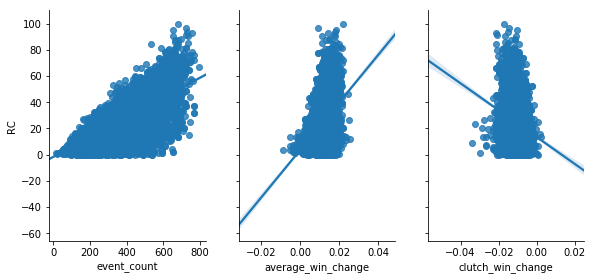

In [75]:
sns.pairplot(dfinf1, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### Infielders who played at least 100 games

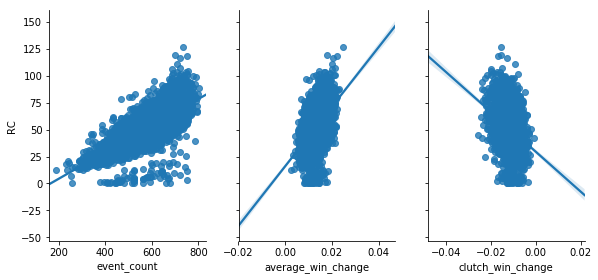

In [76]:
sns.pairplot(dfinf2, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### All Star Infielders

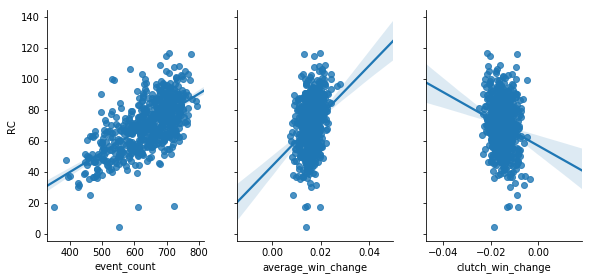

In [77]:
sns.pairplot(dfinf3, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

## Pairplots to view Win Expentancy  vs other features

### Infielders who played at least 30 games

In [78]:
Inf30_Stats_1 = dfinf1[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Inf30_Stats_1.to_csv('Inf30_Stats_1.csv')

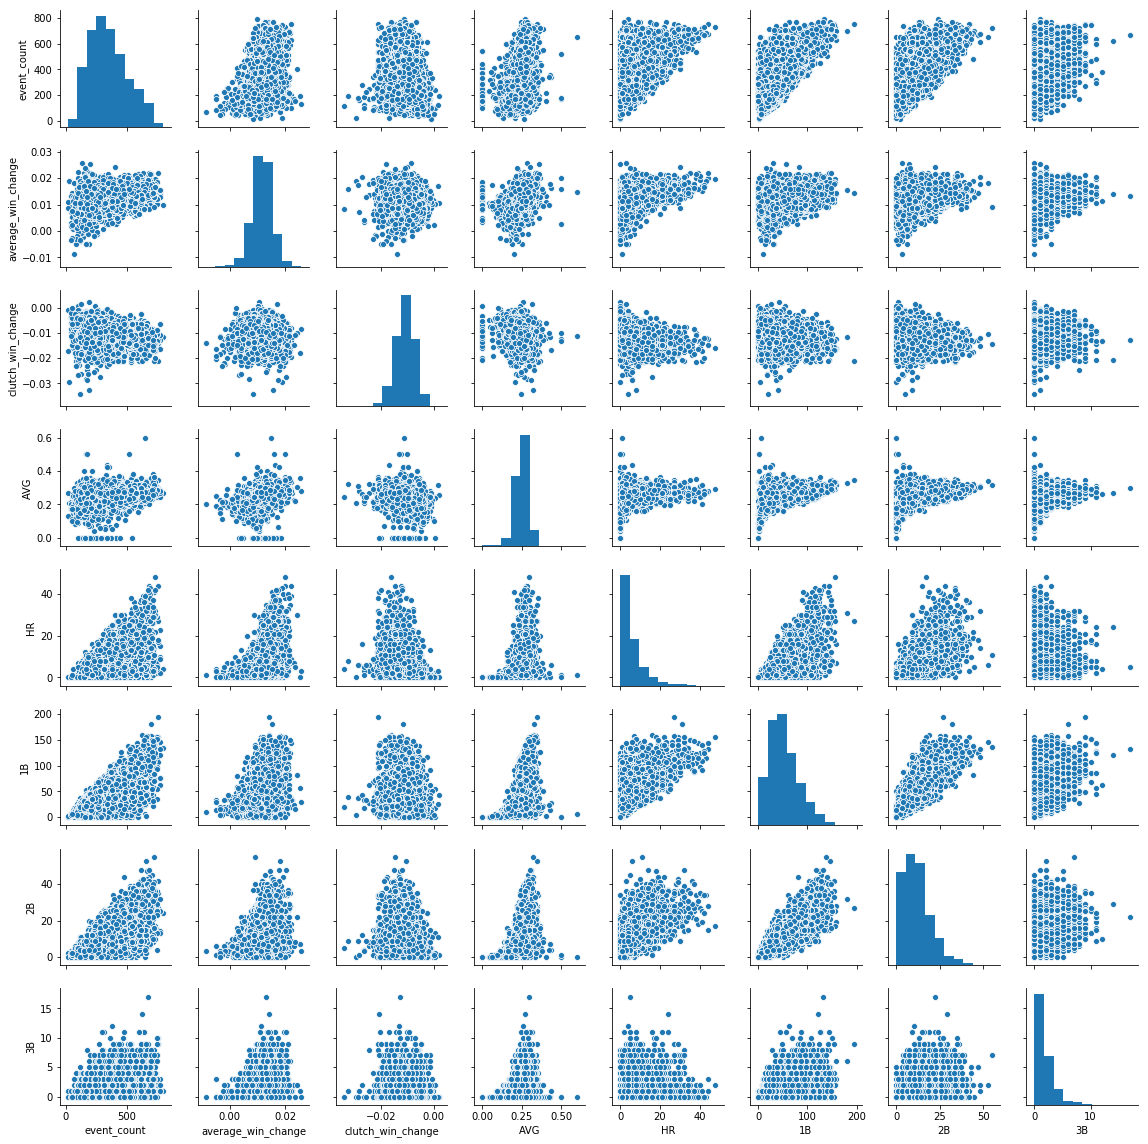

In [79]:
sns.pairplot(Inf30_Stats_1, height= 2)

In [80]:
Inf30_Stats_2 = dfinf1[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Inf30_Stats_2.to_csv('Inf30_Stats_2.csv')

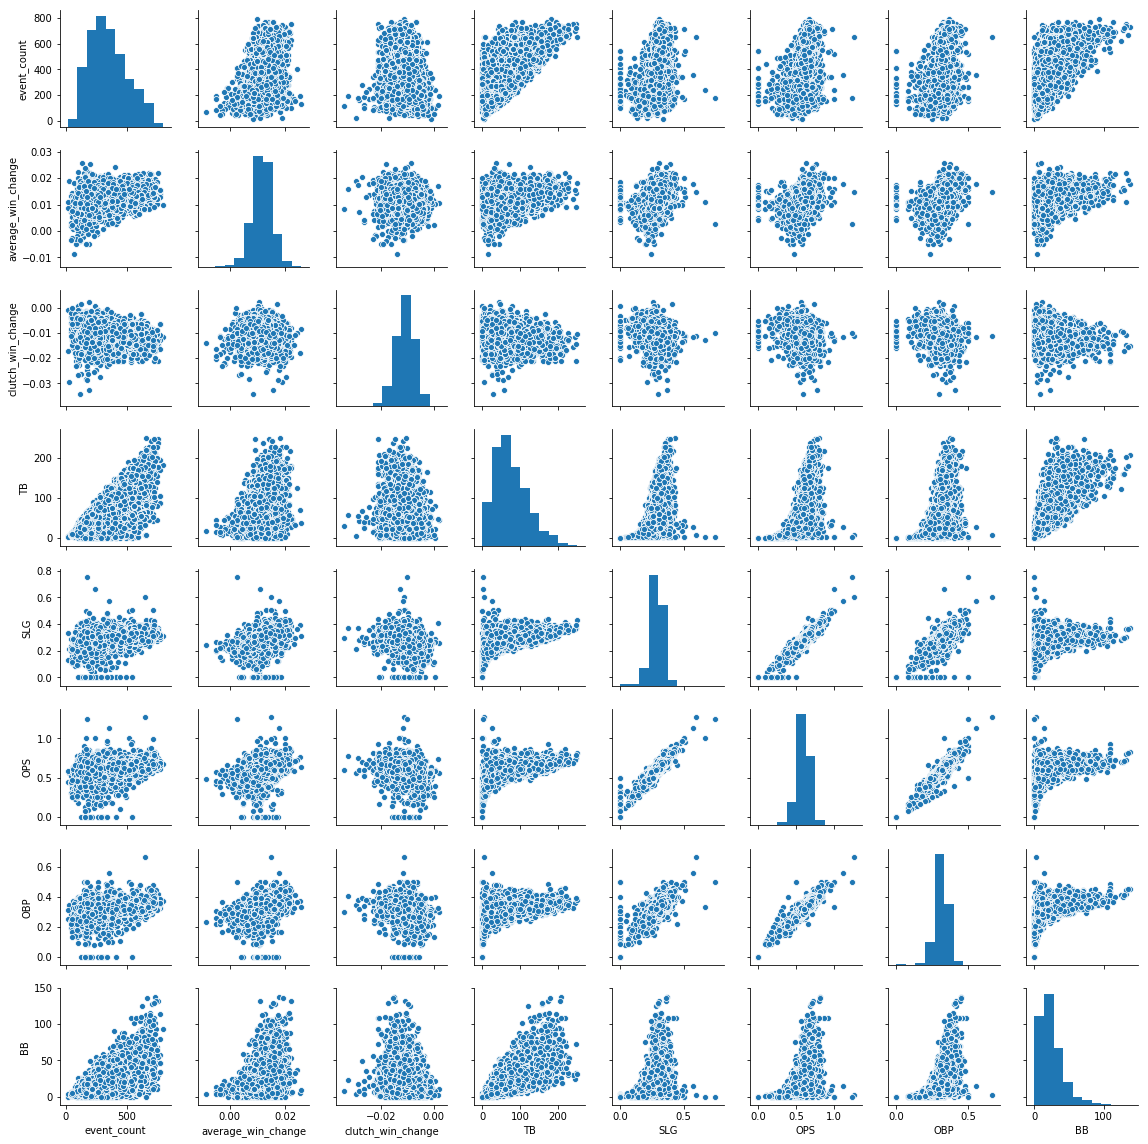

In [81]:
sns.pairplot(Inf30_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

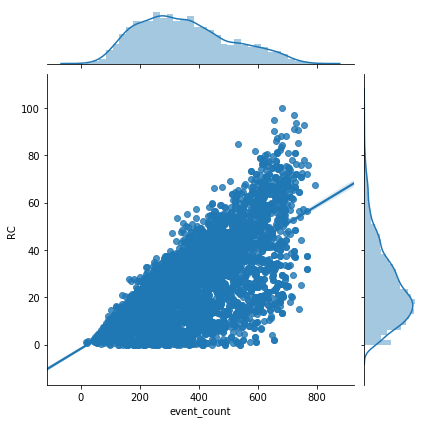

In [82]:
g = sns.jointplot("event_count", "RC", data=dfinf1, kind="reg") 

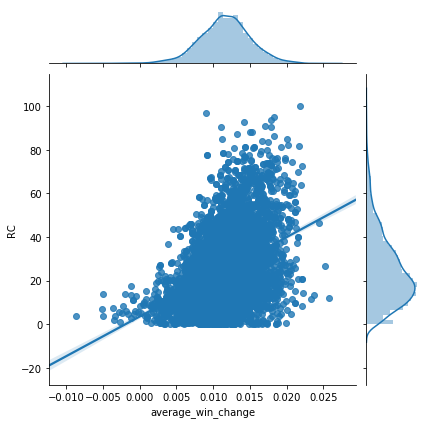

In [83]:
g = sns.jointplot("average_win_change", "RC", data=dfinf1, kind="reg") 

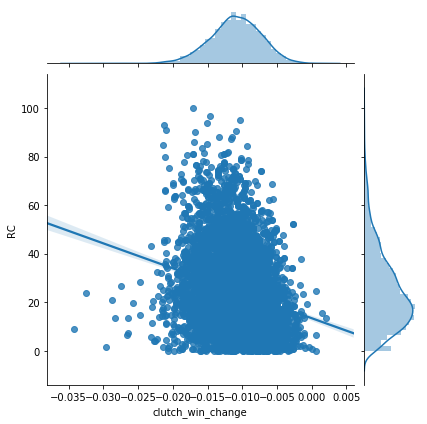

In [84]:
g = sns.jointplot("clutch_win_change", "RC", data=dfinf1, kind="reg") 

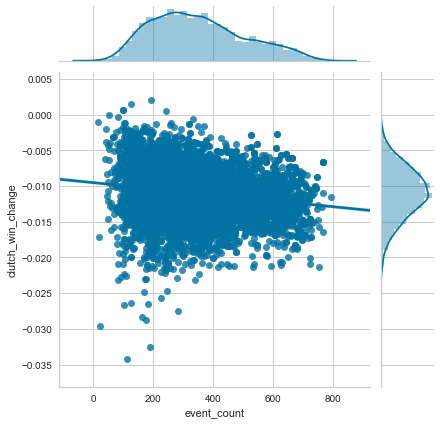

In [202]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfinf1, kind="reg")

### Infielders who played at least 100 games

In [85]:
Inf100_Stats_1 = dfinf2[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Inf100_Stats_1.to_csv('Inf100_Stats_1.csv')

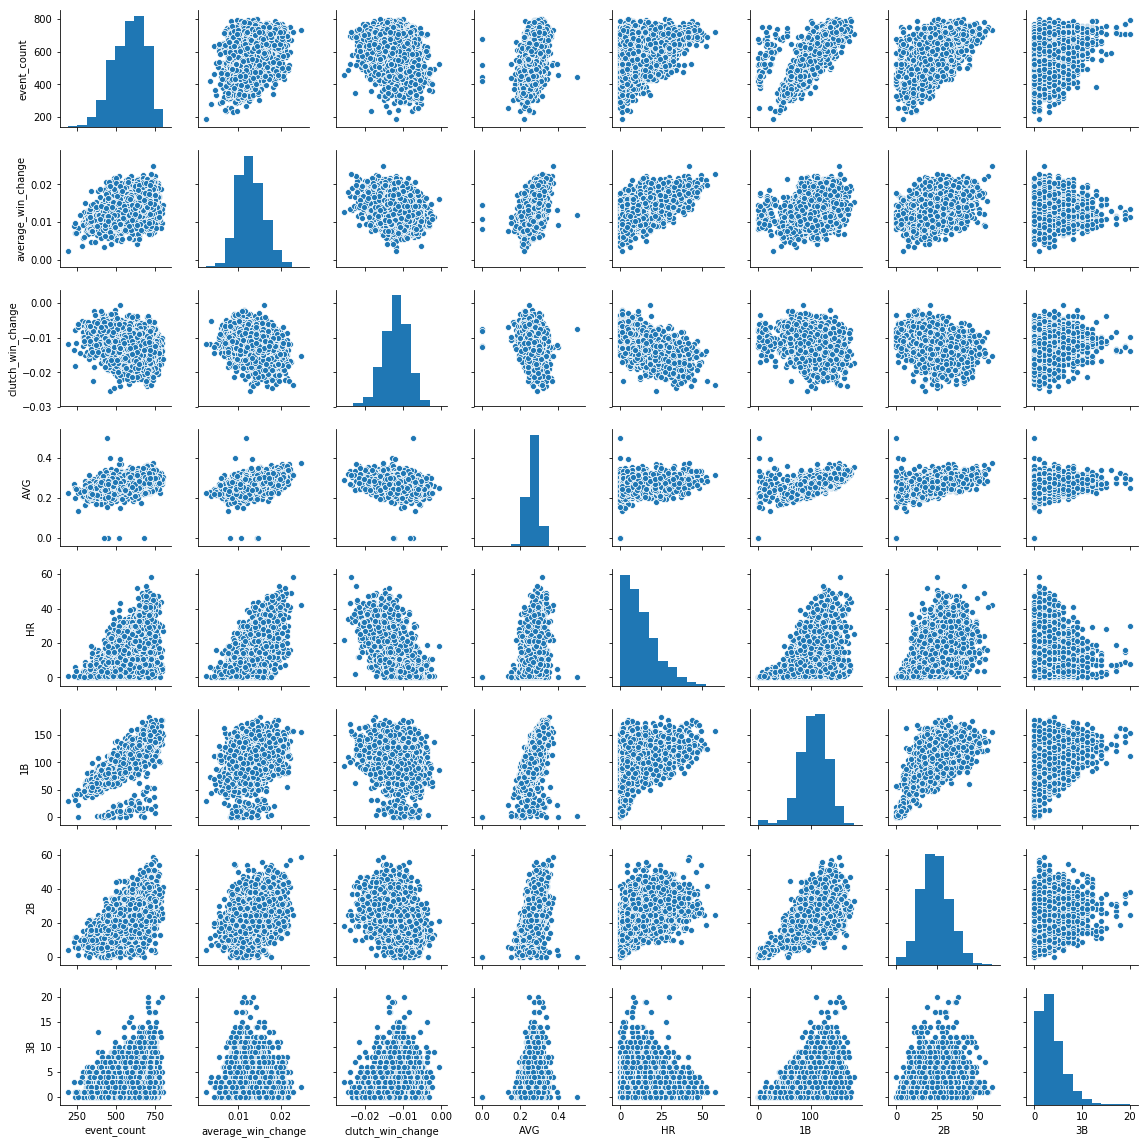

In [86]:
sns.pairplot(Inf100_Stats_1, height= 2)

In [87]:
Inf100_Stats_2 = dfinf2[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Inf100_Stats_2.to_csv('Inf100_Stats_2.csv')

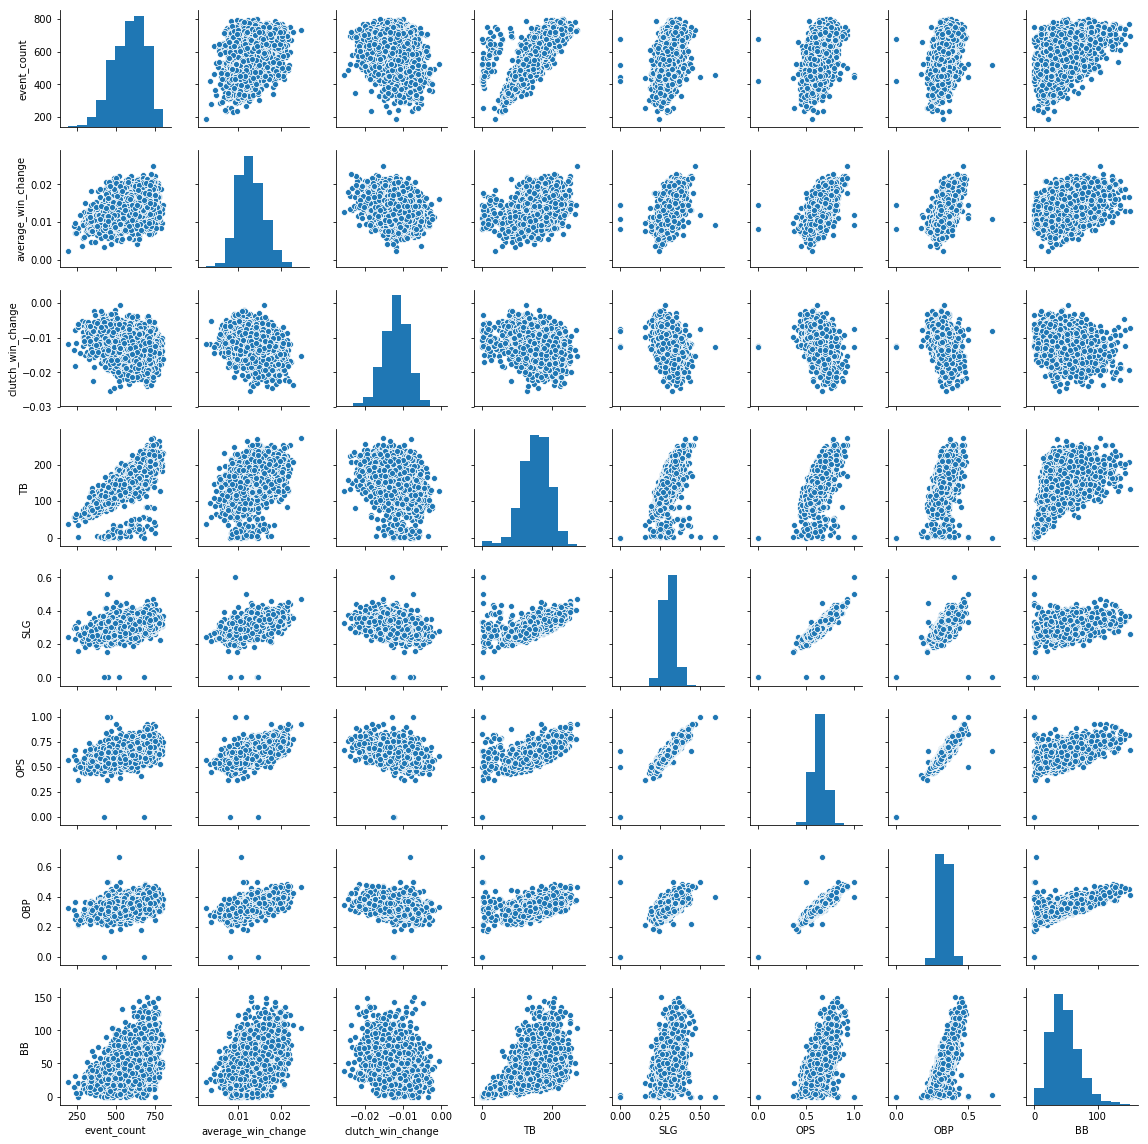

In [88]:
sns.pairplot(Inf100_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

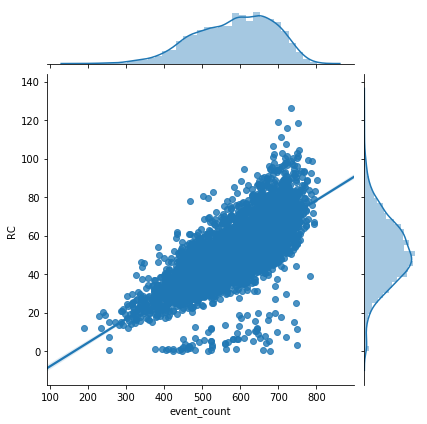

In [89]:
g = sns.jointplot("event_count", "RC", data=dfinf2, kind="reg") 

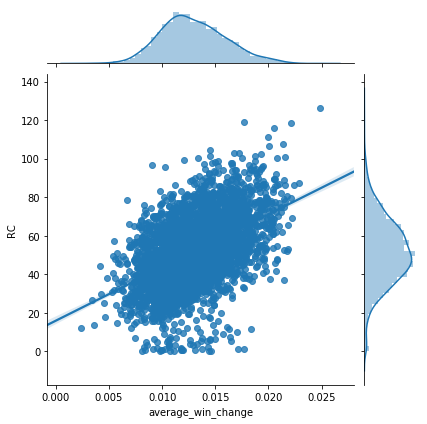

In [90]:
g = sns.jointplot("average_win_change", "RC", data=dfinf2, kind="reg") 

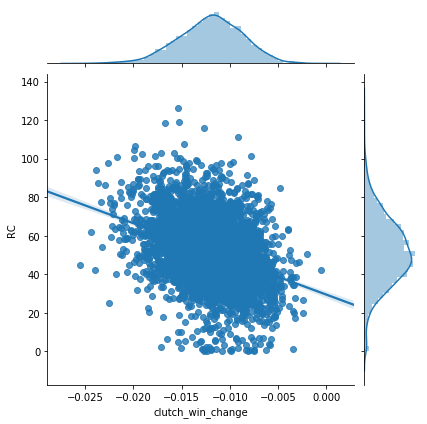

In [91]:
g = sns.jointplot("clutch_win_change", "RC", data=dfinf2, kind="reg") 

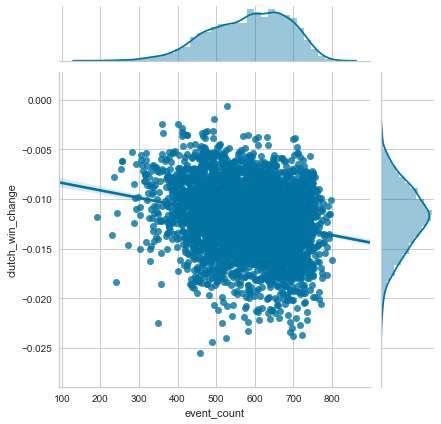

In [203]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfinf2, kind="reg")

### All Star Infielders

In [95]:
Inf_Allstr_Stats_1 = dfinf3[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Inf_Allstr_Stats_1.to_csv('Inf1_Allstr_Stats_1.csv')

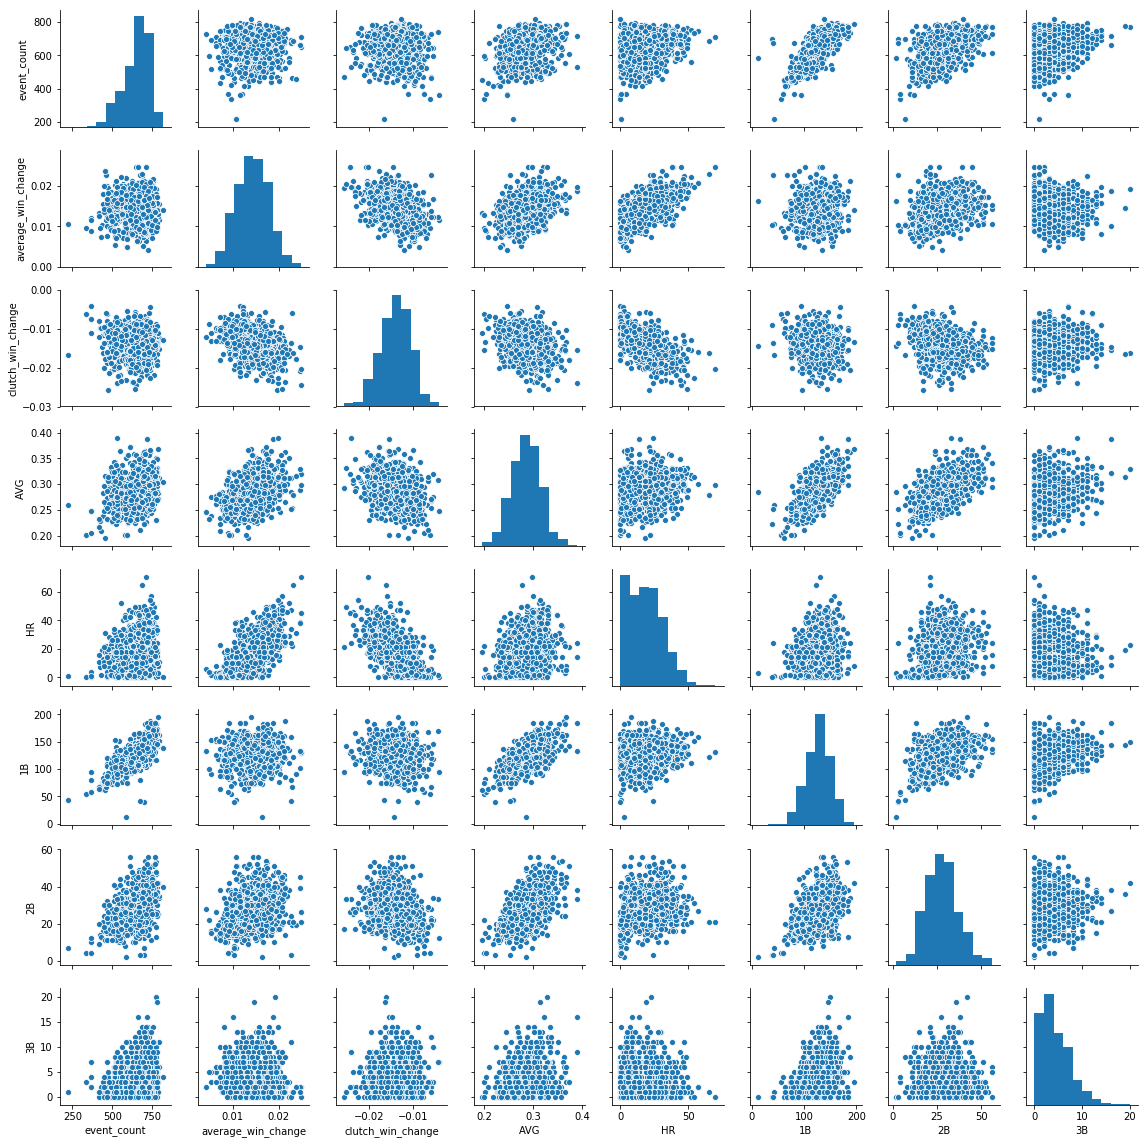

In [96]:
sns.pairplot(Inf_Allstr_Stats_1, height= 2)

In [98]:
Inf_Allstr_Stats_2 = dfinf3[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Inf_Allstr_Stats_2.to_csv('Inf_Allstr_Stats_2.csv')

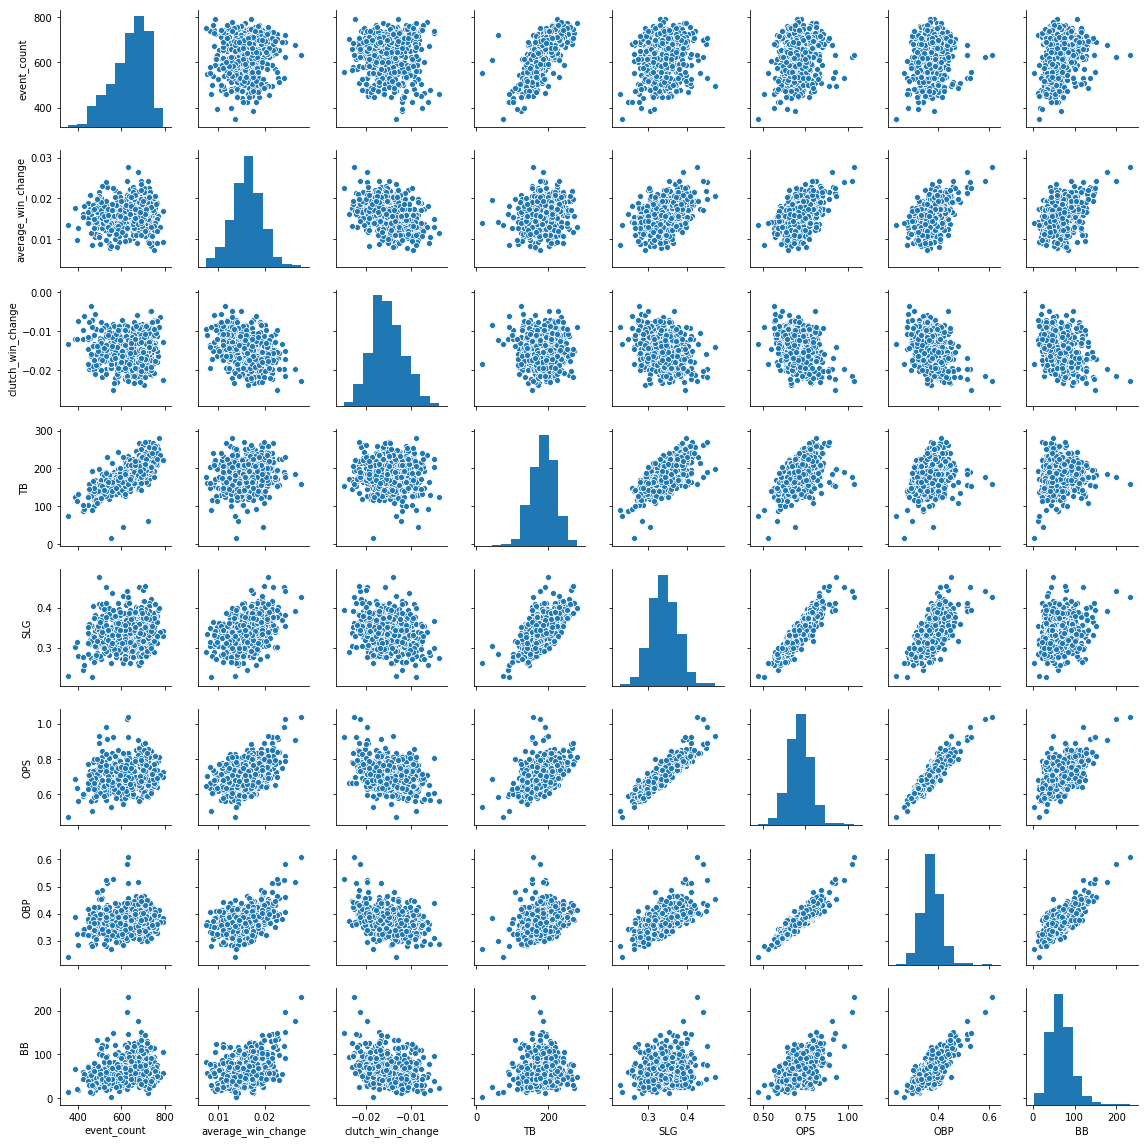

In [97]:
sns.pairplot(Inf_Allstr_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

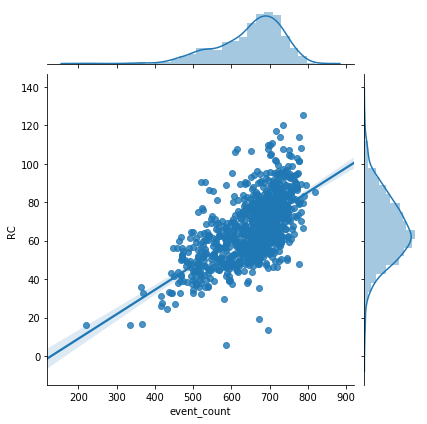

In [99]:
g = sns.jointplot("event_count", "RC", data=dfinf3, kind="reg") 

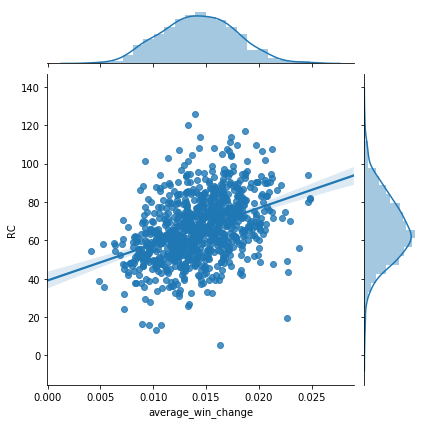

In [100]:
g = sns.jointplot("average_win_change", "RC", data=dfinf3, kind="reg") 

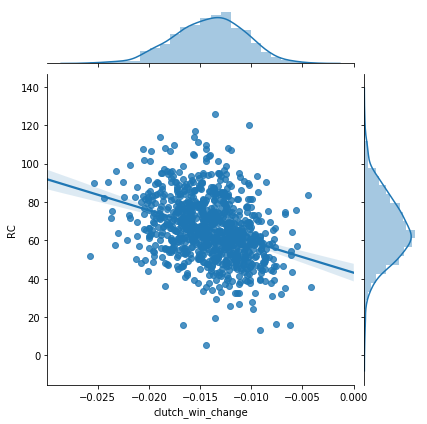

In [101]:
g = sns.jointplot("clutch_win_change", "RC", data=dfinf3, kind="reg") 

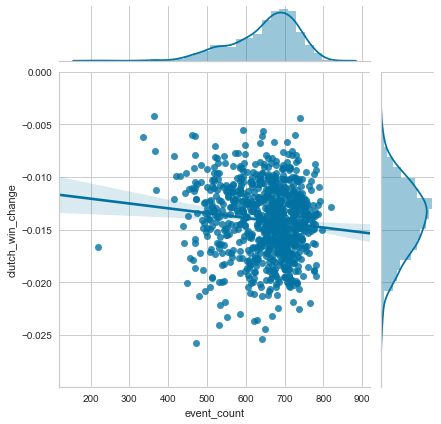

In [201]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfinf3, kind="reg")

## Machine Learning: Can impact on win expectancy predict Runs Created (response)? 

### Infielders who played at least 30 games

#### Create X = features and y = response

In [102]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf1[features]
y = dfinf1['RC']

#### Splitting X and y into training and testing sets

In [103]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [104]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5031, 9)
(1678, 9)
(5031,)
(1678,)


#### Linear Regression to train Model to learn

In [105]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
### Interpreting model coefficents

#### Making Predictions

In [106]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [107]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [108]:
#Outfielders with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.0304035840433925


In [ ]:
#dfinf = 2.03  with all 10 features (Catchers with atleast 30 gms)

### Infielders who played at least 100 games

#### Create X = features and y = response

In [109]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf2[features]
y = dfinf2['RC']

#### Splitting X and y into training and testing sets

In [110]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [111]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3072, 9)
(1025, 9)
(3072,)
(1025,)


#### Linear Regression to train Model to learn

In [112]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [113]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [114]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [115]:
#Catchers with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.5202320845484776


### All Star Infielders

#### Create X = features and y = response

In [116]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfinf3[features]
y = dfinf3['RC']

#### Splitting X and y into training and testing sets

In [117]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [118]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(645, 9)
(215, 9)
(645,)
(215,)


#### Linear Regression to train Model to learn

In [119]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [120]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [121]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [122]:
#All Star Infielders.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.6046121823383461


## Feature selection - Which are the underperforming features?

### Infielders with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [124]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfinf1[features]
y = ['RC']

In [125]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

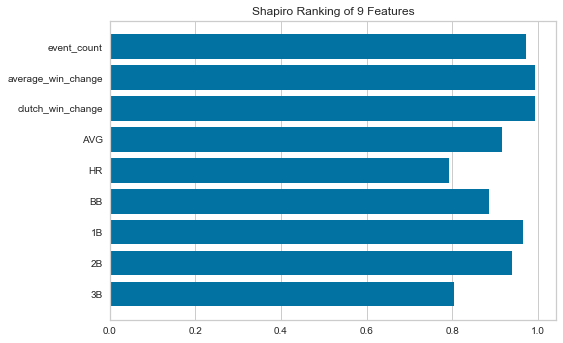

In [126]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [127]:
#Infielders with atleast 30 games
#convert y from float to integer
y = dfinf1.RC.astype(int) 

In [128]:
#Infielders with atleast 30 games
#set X value for all 10 features
X = dfinf1[features]

In [129]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [130]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

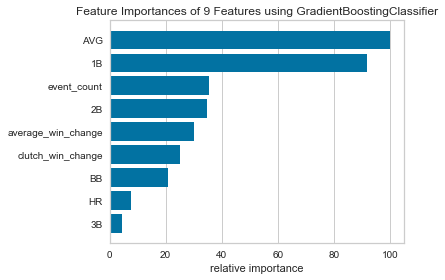

In [131]:
# Infielders with atleast 30 gms
# Model takes over 90 seconds to calculate
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [132]:
#reset value of y to y = dfinf1['RC']
y = dfinf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


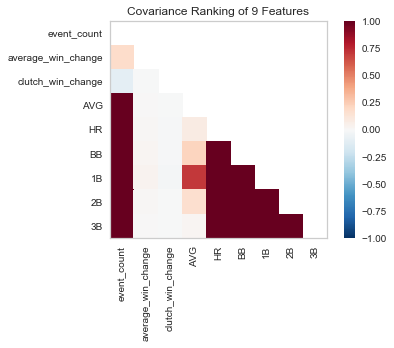

In [133]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Infielders with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [135]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfinf2[features]
y = ['RC']

In [136]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


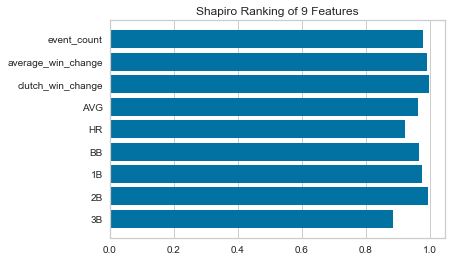

In [137]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [141]:
#Infielders with atleast 100 games
#convert y from float to integer
y = dfinf2.RC.astype(int) 

In [142]:
X = dfinf2[features]

In [143]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [144]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

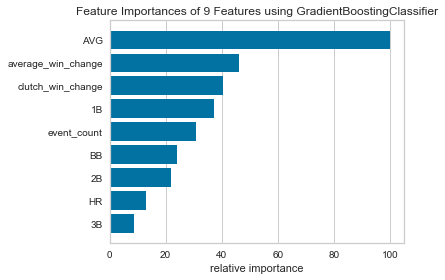

In [145]:
#Infielders with at least 100 gms
#This model takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [146]:
#reset value of y to y = dfinf2['RC']
y = dfinf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


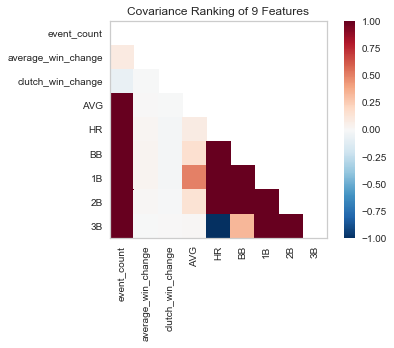

In [147]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Infielders

#### Yellowbrick's Feature Rank Visualizer

In [149]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfinf3[features]
y = ['RC']

In [150]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


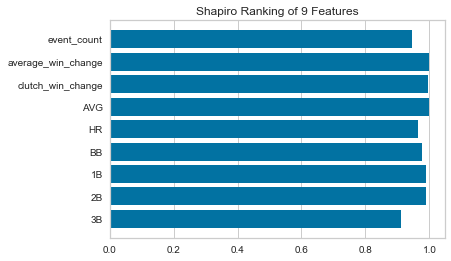

In [151]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [152]:
#convert y from float to integer
y = dfinf3.RC.astype(int) 

In [153]:
X = dfinf3[features]

In [154]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [155]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

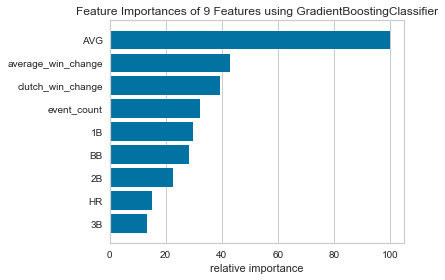

In [156]:
#All Star Infielders
#This model takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [157]:
#reset value of y to y = dfinf3['RC']
y = dfinf3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


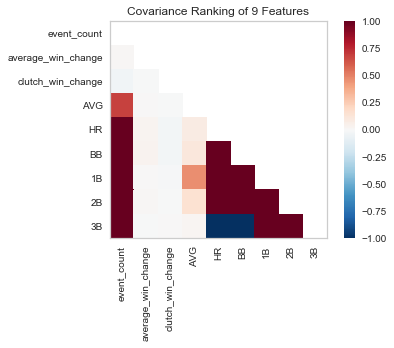

In [158]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Infielders with atleast 30 games

In [159]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfinf1[features]
y = dfinf1['RC']

#### Ridge Regression - R2 Score

In [160]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [161]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.971961460298707


In [ ]:
#score to high = overfitted. Must remove features and add noise

In [162]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['event_count','average_win_change','clutch_win_change']

In [163]:
X= dfinf1[features]

In [164]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.537581291298854


#### Lasso Regression -R2 Score

In [104]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [165]:
#Re-set X with only win expectancy features
features = ['event_count','average_win_change','clutch_win_change']
X = dfinf1[features]
y = dfinf1['RC']

In [166]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.537581291298854


## Data Visualization

### Infielders with at least 30 gms

#### Visualize Plot Error

In [169]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf1
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfinf1[features]
y = dfinf1['RC']


In [170]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

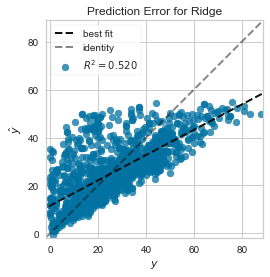

In [171]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

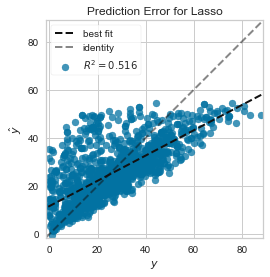

In [172]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

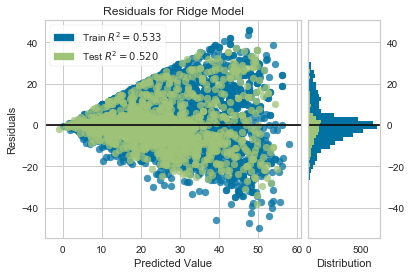

In [173]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [174]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

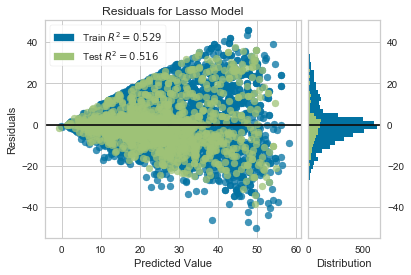

In [175]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Infielders with atleast 100 games

In [176]:
#Reset X and y values
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfinf2[features]
y = dfinf2['RC']

#### Ridge Regression -R2 Score

In [177]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [178]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5202325887027199


#### Lasso Regression -R2 Score

In [179]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [180]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5202325887027199


## Data Visualization

### Infielders with at least 100 gms

#### Visualize Plot Error

In [182]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf2
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfinf2[features]
y = dfinf2['RC']

In [183]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

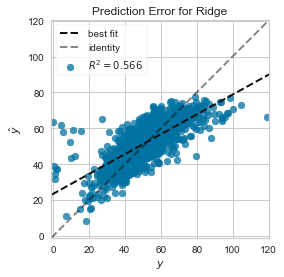

In [184]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

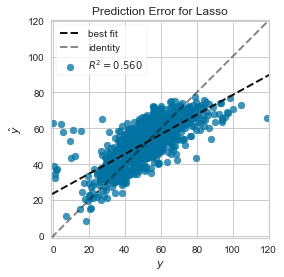

In [185]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

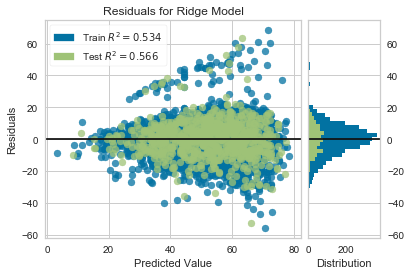

In [186]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

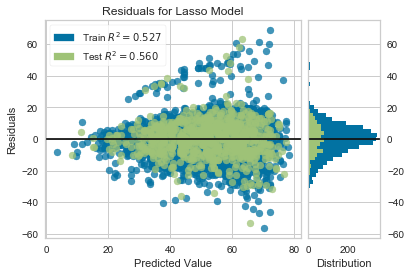

In [187]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Infielders 

In [188]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change']
X = dfinf3[features]
y = dfinf3['RC']

#### Ridge Regression - R2 Score

In [189]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [190]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.48577143326474315


#### Lasso Regression -R2 Score

In [191]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [192]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.48577143326474315


## Data Visualization

### All Star Outfielders 

#### Visualize Plot Error

In [193]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfinf3
features = ['event_count','average_win_change','clutch_win_change']
X = dfinf3[features]
y = dfinf3['RC']

In [194]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

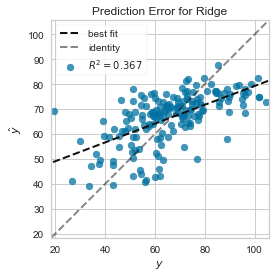

In [195]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

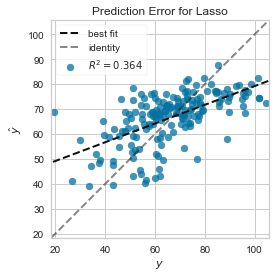

In [196]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

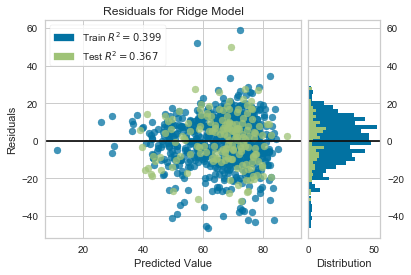

In [197]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

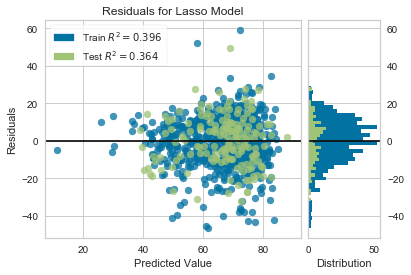

In [198]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()